# Data Visualization II

## Customizing Plot Legends

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [3]:
%matplotlib inline
import numpy as np

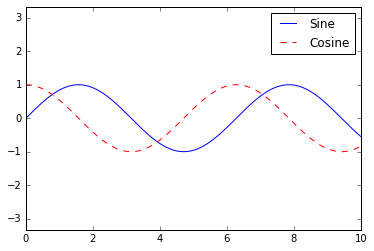

In [5]:
x = np.linspace(0,10,1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
ax.axis('equal')
leg = ax.legend();

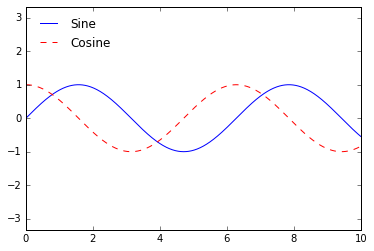

In [6]:
ax.legend(loc = 'upper left', frameon = False) ## loc is used to specify the location of the legend
fig

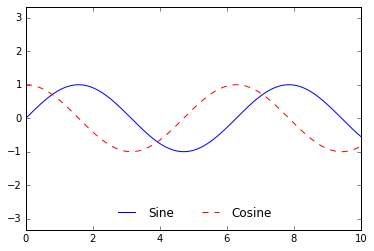

In [7]:
ax.legend(frameon = False, loc = 'lower center', ncol = 2) ## ncol is used to create columns for the legend
fig

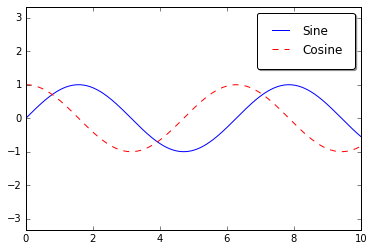

In [8]:
ax.legend(fancybox = True, framealpha = 1, shadow = True, borderpad = 1) ## fancy box is used to enclose the legends
fig

### Choosing Elements for the Legend

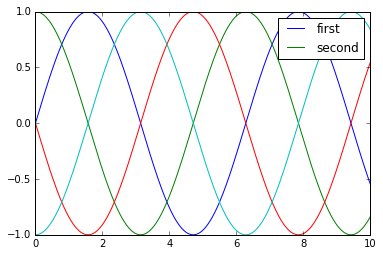

In [9]:
y = np.sin(x[:, np.newaxis] + np.pi*np.arange(0,2,0.5))
lines = plt.plot(x,y)

## lines is a list of plt.line2D instances
plt.legend(lines[:2], ['first','second']);

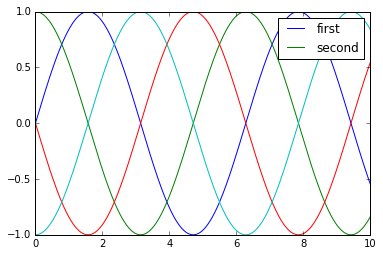

In [10]:
plt.plot(x, y[:,0], label = 'first')
plt.plot(x, y[:,1], label = 'second')
plt.plot(x,y[:,2:])
plt.legend(framealpha = 1, frameon = True);

   ### Multiple Legends

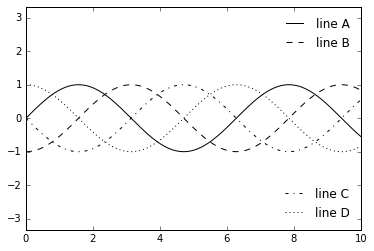

In [12]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

## Customizing Colorbars

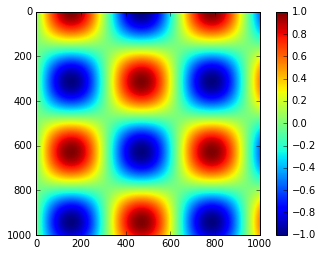

In [13]:
x = np.linspace(0,10,1000)
I = np.sin(x)*np.cos(x[:,np.newaxis])
plt.imshow(I)
plt.colorbar();

### Customizing Colorbars

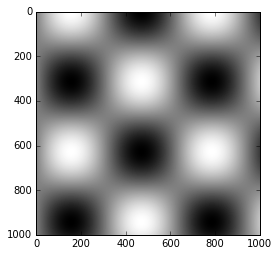

In [14]:
plt.imshow(I, cmap='gray'); ## cmap is used to specify the colormap

### Choosing the Colormap

In [15]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

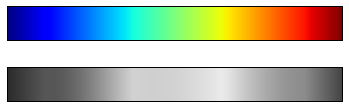

In [16]:
view_colormap('jet')

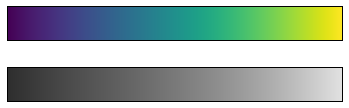

In [17]:
view_colormap('viridis')

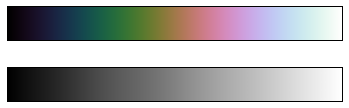

In [18]:
view_colormap('cubehelix')

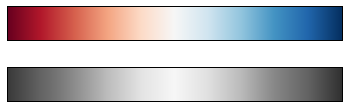

In [19]:
view_colormap('RdBu')

### Color limits and extensions